In [1]:
credit_data_sample<- read.csv("M:\\Imarticus\\ProjectR\\Credit card fraud\\Datafiles\\credit_data_sample.csv", header = TRUE,
                              stringsAsFactors = TRUE,
                              strip.white = FALSE ,
                              sep = ',')
table(credit_data_sample$Class)


   0    1 
1506  492 

In [2]:
credit_data_sample$Class= as.factor(credit_data_sample$Class)
library(InformationValue)

fit = glm(Class ~ V4+V10+V12+V14, data=credit_data_sample, family=binomial(logit))
pred = predict(fit, data= credit_data_sample, type="response")
summary(fit)


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Class ~ V4 + V10 + V12 + V14, family = binomial(logit), 
    data = credit_data_sample)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5181  -0.2415  -0.1507  -0.0454   3.4572  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.86100    0.18478 -20.895  < 2e-16 ***
V4           0.72079    0.08685   8.299  < 2e-16 ***
V10         -0.60813    0.15645  -3.887 0.000101 ***
V12         -0.60954    0.12059  -5.055 4.31e-07 ***
V14         -0.78177    0.10750  -7.272 3.54e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2230.46  on 1997  degrees of freedom
Residual deviance:  452.93  on 1993  degrees of freedom
AIC: 462.93

Number of Fisher Scoring iterations: 9


In [3]:
confusionMatrix(credit_data_sample$Class,pred>0.7)

,0,1
0,1499,68
1,7,424


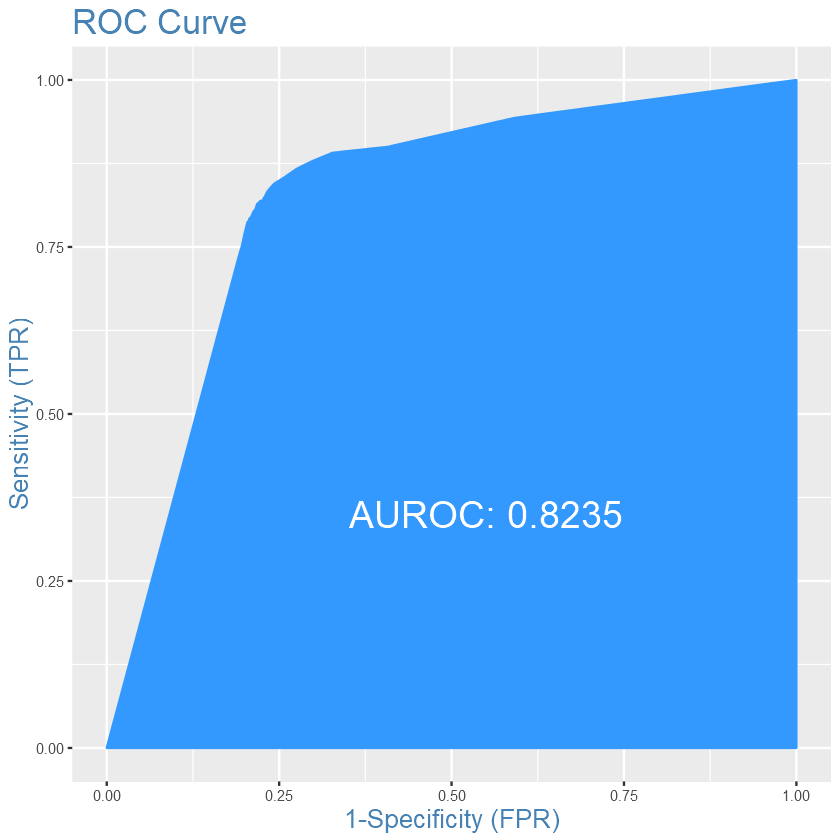

In [4]:
plotROC(credit_data_sample,pred)

In [5]:
sensitivity(credit_data_sample$Class, pred, threshold = 0.6)
specificity(credit_data_sample$Class, pred, threshold = 0.6)

[1] 0.8678862

[1] 0.9946879

In [6]:
library(caTools)
split = sample.split(credit_data_sample$Class, SplitRatio = .8)
training_data = subset(credit_data_sample, split == TRUE)
test_data = subset(credit_data_sample, split == FALSE)
nrow(test_data)

[1] 399

In [7]:
fit_train = glm(Class ~V4 + V10 + V12 + V14, training_data, family=binomial)
summary(fit_train)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Class ~ V4 + V10 + V12 + V14, family = binomial, 
    data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3893  -0.2422  -0.1524  -0.0414   3.4735  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.9053     0.2111 -18.498  < 2e-16 ***
V4            0.7234     0.0971   7.450 9.31e-14 ***
V10          -0.7693     0.1776  -4.333 1.47e-05 ***
V12          -0.5543     0.1295  -4.279 1.88e-05 ***
V14          -0.6789     0.1142  -5.946 2.74e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1785.60  on 1598  degrees of freedom
Residual deviance:  365.09  on 1594  degrees of freedom
AIC: 375.09

Number of Fisher Scoring iterations: 9


In [19]:
pred_test <-predict(fit_train,test_data, type="response")


confusionMatrix(test_data$Class,pred_test>0.7)

,0,1
0,301,15
1,0,83


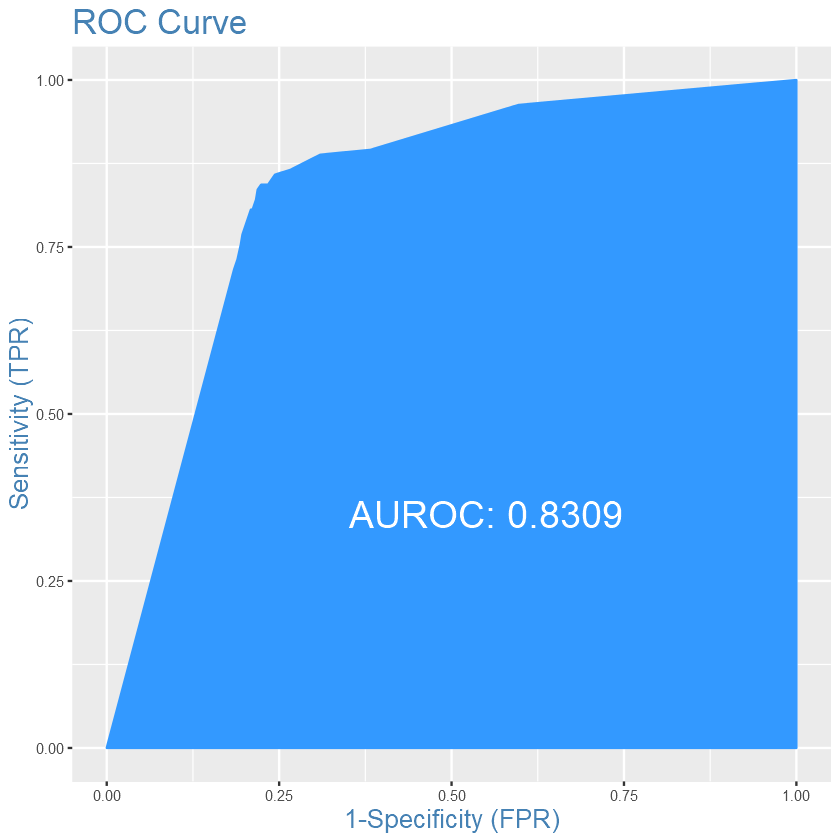

In [20]:
plotROC(test_data,pred_test)


In [21]:
sensitivity(test_data$Class, pred_test, threshold = 0.6)
specificity(test_data$Class, pred_test, threshold = 0.6)

[1] 0.8469388

[1] 1

In [26]:
library(readr)
credit_data<- read.csv("M:\\Imarticus\\ProjectR\\Credit card fraud\\Datafiles\\creditcard.csv", header = TRUE,
                       stringsAsFactors = TRUE,
                       strip.white = FALSE ,
                       sep = ',')

In [22]:
pred_data <-predict(fit_train,credit_data, type="response")


confusionMatrix(credit_data$Class,pred_data>0.7)

,0,1
0,283361,69
1,954,423


In [24]:
sensitivity(credit_data$Class, pred_test, threshold = 0.6)
specificity(credit_data$Class, pred_test, threshold = 0.6)

[1] 0.8658537

[1] 0.9948402

In [1]:
#conclusion 
#1. classification of class variable mostly depends on V4,V10,V12 & V14 variables.